In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_300518/1995753575.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


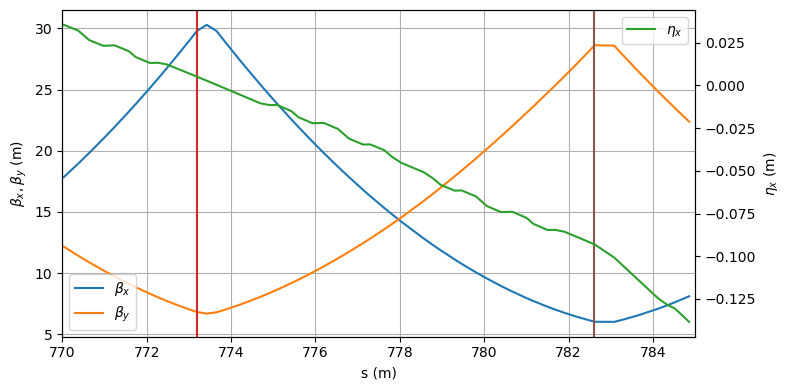

In [23]:


# ファイルを読み込む
filename = "sler_1801_80_1.disp"  # ファイル名を指定
columns = ["AX", "BX", "NX", "EX", "EPX", "Element", "Length", "Value", "s", 
           "AY", "BY", "NY", "EY", "EPY", "DetR", "ID"]

# ヘッダー行をスキップして読み込み
data = pd.read_csv(
    filename, 
    delim_whitespace=True, 
    names=columns, 
    comment="A"  # 'A'で始まる行を無視
)

# s の範囲を指定
s_min = 770
s_max = 785

# 指定範囲内のデータを抽出
filtered_data = data[(data["s"] >= s_min) & (data["s"] <= s_max)]

# プロット
fig, ax1 = plt.subplots(figsize=(8, 4))

# 左軸に BX と BY をプロット
ax1.plot(filtered_data["s"], filtered_data["BX"], label=r"$\beta_x$", color="tab:blue")
ax1.plot(filtered_data["s"], filtered_data["BY"], label=r"$\beta_y$", color="tab:orange")
ax1.set_xlabel("s (m)")
ax1.set_ylabel(r'$\beta_x, \beta_y$ (m)')
ax1.tick_params(axis="y")

ax1.grid()
ax1.axvline(773.19,color='tab:red')
ax1.axvline(782.61,color='tab:brown')


# 横軸ラベルにエレメント名と s を表示
#ax1.set_xticks(filtered_data["s"])
#ax1.set_xticklabels(
#    filtered_data["Element"] + "\n" + filtered_data["s"].round(2).astype(str),
#    rotation=45
#)

# 右軸に EX をプロット
ax2 = ax1.twinx()
ax2.plot(filtered_data["s"], filtered_data["EX"], label=r"$\eta_x$", color="tab:green")
#ax2.plot(filtered_data["s"], filtered_data["EPX"], label=r"$\eta'_x$", color="tab:purple",marker='o')
ax2.set_ylabel(r"$\eta_x$ (m)")
ax2.tick_params(axis="y")
ax2.legend(loc="upper right")
ax1.legend(loc="lower left")
plt.xlim(s_min,s_max)
plt.tight_layout()
plt.xlim(770,785)
plt.savefig('lattice_D10_L02.png',dpi=100)
plt.show()



In [2]:
D10_L02_after=np.array([0.000000983,
0.000001126,
0.000002579,
0.000000774,
0.000001225,
0.000001142,
0.000000763,
0.000001985,
0.000001360,
0.000004580,
0.000000262,
0.000000139,
0.000001953,
0.000000343,
0.000001228,
0.000000802,
0.000002742,
0.000001790,
0.000000480,
0.000000707,
0.000001065,
0.000001102,
0.000001808,
0.000001060,
0.000002549,
0.000001602,
0.000009156,
0.000001535,
0.000002393,
0.000001177,
0.000000907,
0.000001040,
0.000000710,
0.000001641,
0.000000769,
0.000001690,
0.000001081,
0.000000807])

D10_L03_after=np.array([0.000001032,
0.000001202,
0.000003094,
0.000000822,
0.000001354,
0.000001198,
0.000000883,
0.000002177,
0.000001354,
0.000004932,
0.000000271,
0.000000548,
0.000002182,
0.000000401,
0.000001275,
0.000000865,
0.000003064,
0.000001842,
0.000000576,
0.000001025,
0.000001220,
0.000001038,
0.000001946,
0.000001168,
0.000003173,
0.000001907,
0.000009349,
0.000001521,
0.000002555,
0.000001292,
0.000000890,
0.000001184,
0.000000803,
0.000001671,
0.000000800,
0.000001756,
0.000001230,
0.000000863])

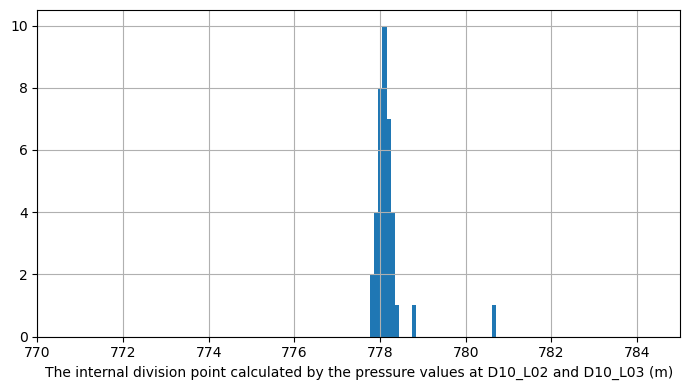

In [19]:
plt.figure(figsize=(7,4))
plt.hist((D10_L02_after*773.19+D10_L03_after*782.61)/(D10_L02_after+D10_L03_after),bins=30)
plt.grid()
#plt.axvline(773.19,color='tab:brown')
#plt.axvline(782.61,color='tab:brown')
plt.xlim(770,785)
plt.xlabel('The internal division point calculated by the pressure values at D10_L02 and D10_L03 (m)')
plt.tight_layout()
plt.savefig('output.png',dpi=100)
plt.show()

In [13]:
(D10_L02_after*772.3+D10_L03_after*781.7)/(D10_L02_after+D10_L03_after)

array([776.93380282, 776.96340378, 777.31221827, 776.96676096,
       777.14120172, 777.42275132, 777.14135338, 777.21860465,
       776.98265683, 777.36639785, 777.0936255 , 777.85182397,
       776.8682243 , 777.175     , 777.41509972, 777.04824419,
       777.04259819, 777.18005284, 777.0793621 , 777.32982456])

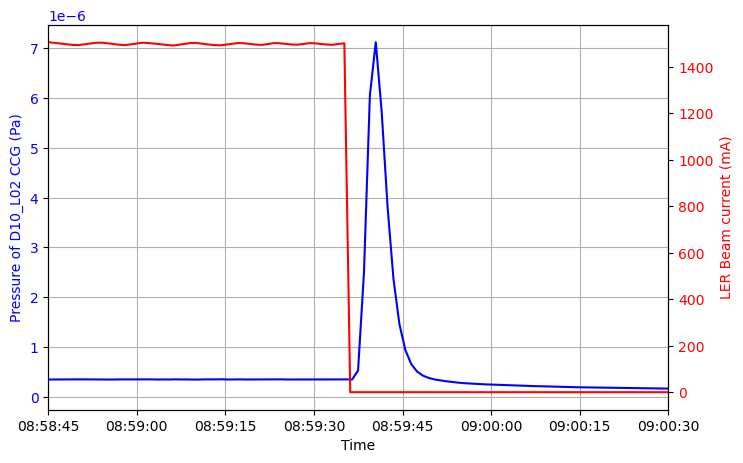

In [4]:
df = pd.read_csv('c3yAUruV.csv', skipinitialspace=True)

# 時刻データをdatetime型に変換
df['Time'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df_1 = df.drop(columns=['BM_DCCT:LCUR'])
df_2 = df.drop(columns=['VALCCG:D10_L02:PRES'])
# 数値データを適切な型に変換 (欠損値を処理)
df_1['VALCCG:D10_L02:PRES'] = pd.to_numeric(df_1['VALCCG:D10_L02:PRES'], errors='coerce')
df_2['BM_DCCT:LCUR'] = pd.to_numeric(df_2['BM_DCCT:LCUR'], errors='coerce')

df_1=df_1.dropna()
df_2=df_2.dropna()
# プロット設定
fig, ax1 = plt.subplots(figsize=(8, 5))

# 左軸プロット
ax1.plot(df_1['Time'], df_1['VALCCG:D10_L02:PRES'], label='Pressure of D10_L02 CCG', color='b')
ax1.set_xlabel('Time')
ax1.set_ylabel('Pressure of D10_L02 CCG (Pa)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid()

# 右軸プロット
ax2 = ax1.twinx()
ax2.plot(df_2['Time'], df_2['BM_DCCT:LCUR'], label='LER Beam current', color='r')
ax2.set_ylabel('LER Beam current (mA)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

start_time = '2024-10-21 08:58:45'
end_time = '2024-10-21 09:00:30'
ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
# 表示
plt.savefig('pressureburst_example.png',dpi=100)
plt.show()



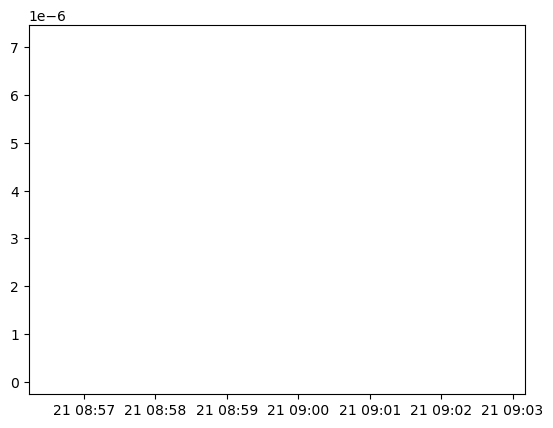

In [38]:
plt.plot(df['Time'], df['VALCCG:D10_L02:PRES'], label='Pressure of D10_L02 CCG', color='b')

In [39]:
df

,Timestamp,VALCCG:D10_L02:PRES,BM_DCCT:LCUR,Time
0,2024/10/21 08:56:32.136,NaN,1493.7108,2024-10-21 08:56:32.136
1,2024/10/21 08:56:32.461,3.428063e-07,NaN,2024-10-21 08:56:32.461
2,2024/10/21 08:56:33.136,NaN,1497.6379,2024-10-21 08:56:33.136
3,2024/10/21 08:56:33.461,3.433738e-07,NaN,2024-10-21 08:56:33.461
4,2024/10/21 08:56:34.136,NaN,1500.6923,2024-10-21 08:56:34.136
...,...,...,...,...
755,2024/10/21 09:02:49.461,8.856262e-08,NaN,2024-10-21 09:02:49.461
756,2024/10/21 09:02:50.136,NaN,0.0010,2024-10-21 09:02:50.136
757,2024/10/21 09:02:50.461,8.890176e-08,NaN,2024-10-21 09:02:50.461
758,2024/10/21 09:02:51.136,NaN,0.0050,2024-10-21 09:02:51.136
